## 1. 데이터 로드하기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
path = '/content/drive/MyDrive/kidney_disease.csv'
df = pd.read_csv(path)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## 2. 데이터 살펴보기
- 데이터의 일반정보
- 데이터의 통계량
- 데이터의 shape

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

## 3. 데이터의 전처리

- 결측치가 전체의 30% 이상인 경우 해당 열을 제거하시오.
- 결측치가 전체의 30% 미만인 경우, 평균값으로 대체하시오.

In [8]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
df.drop(columns=['rbc', 'rc'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  htn             398 non-null    obj

In [10]:
target = list(df.columns[df.dtypes=='float64'])

for col in target:
  df[col].fillna(df[col].mean(), inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  htn             398 non-null    obj

In [12]:
target = list(df.columns[df.dtypes=='object'])
target = target[:-1]
target

['pc', 'pcc', 'ba', 'pcv', 'wc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [13]:
for col in target:
  df[col].fillna(df[col].mode()[0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  wc              400 non-null    object 
 17  htn             400 non-null    obj

### 4. 데이터의 전처리 2
- 데이터의 dtype이 'obejct' 인 경우,
  - 알맞은 인코딩을 수행하시오.

In [14]:
unique_values = {col: df[col].unique() for col in df.columns[df.dtypes=='object']}
unique_values

{'pc': array(['normal', 'abnormal'], dtype=object),
 'pcc': array(['notpresent', 'present'], dtype=object),
 'ba': array(['notpresent', 'present'], dtype=object),
 'pcv': array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '41',
        '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
        '14', '22', '18', '42', '17', '46', '23', '19', '25', '26', '15',
        '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51', '54'],
       dtype=object),
 'wc': array(['7800', '6000', '7500', '6700', '7300', '9800', '6900', '9600',
        '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
        '6200', '8300', '8400', '10300', '9100', '7900', '6400', '8600',
        '18900', '21600', '4300', '8500', '11300', '7200', '7700', '14600',
        '6300', '\t6200', '7100', '11800', '9400', '5500', '5800', '13200',
        '12500', '5600', '7000', '11900', '10400', '10700', '12700',
        '6800', '6500', '13600', '10200', '9000', '14900', '8

In [15]:
df['pcv'].replace(['\t?', '\t43'], ['0', '43'], inplace = True)

In [16]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '41',
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '0', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [17]:
df['wc'].replace(['\t?', '\t6200'], ['0', '6200'], inplace = True)
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', '9800', '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9100', '7900', '6400', '8600',
       '18900', '21600', '4300', '8500', '11300', '7200', '7700', '14600',
       '6300', '7100', '11800', '9400', '5500', '5800', '13200', '12500',
       '5600', '7000', '11900', '10400', '10700', '12700', '6800', '6500',
       '13600', '10200', '9000', '14900', '8200', '15200', '5000',
       '16300', '12400', '\t8400', '10500', '4200', '4700', '10900',
       '8100', '9500', '2200', '12800', '11200', '19100', '0', '12300',
       '16700', '2600', '26400', '8800', '7400', '4900', '8000', '12000',
       '15700', '4100', '5700', '11500', '5400', '10800', '9900', '5200',
       '5900', '9300', '9700', '5100', '6600'], dtype=object)

In [18]:
df['pcv'] = df['pcv'].astype('int64')
df['wc'] = df['wc'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  htn             400 non-null    obj

In [22]:
df['pcv'].replace(0, df['pcv'].mean(), inplace=True)
df['wc'].replace(0, df['wc'].mean(), inplace=True)

In [25]:
unique_values = {col: df[col].unique() for col in df.columns[df.dtypes=='object']}
unique_values

{'pc': array(['normal', 'abnormal'], dtype=object),
 'pcc': array(['notpresent', 'present'], dtype=object),
 'ba': array(['notpresent', 'present'], dtype=object),
 'htn': array(['yes', 'no'], dtype=object),
 'dm': array(['yes', 'no', ' yes', '\tno', '\tyes'], dtype=object),
 'cad': array(['no', 'yes', '\tno'], dtype=object),
 'appet': array(['good', 'poor'], dtype=object),
 'pe': array(['no', 'yes'], dtype=object),
 'ane': array(['no', 'yes'], dtype=object),
 'classification': array(['ckd', 'ckd\t', 'notckd'], dtype=object)}

In [26]:
df['dm'].replace(['\tno', '\tyes'], ['no', 'yes'], inplace = True)
df['cad'].replace('\tno', 'no', inplace = True)
df['classification'].replace('ckd\t', 'ckd', inplace = True)

In [27]:
unique_values = {col: df[col].unique() for col in df.columns[df.dtypes=='object']}
unique_values

{'pc': array(['normal', 'abnormal'], dtype=object),
 'pcc': array(['notpresent', 'present'], dtype=object),
 'ba': array(['notpresent', 'present'], dtype=object),
 'htn': array(['yes', 'no'], dtype=object),
 'dm': array(['yes', 'no', ' yes'], dtype=object),
 'cad': array(['no', 'yes'], dtype=object),
 'appet': array(['good', 'poor'], dtype=object),
 'pe': array(['no', 'yes'], dtype=object),
 'ane': array(['no', 'yes'], dtype=object),
 'classification': array(['ckd', 'notckd'], dtype=object)}

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns[df.dtypes=='object']:
  df[col] = le.fit_transform(df[col])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    int64  
 17  htn             400 non-null    int

<Axes: >

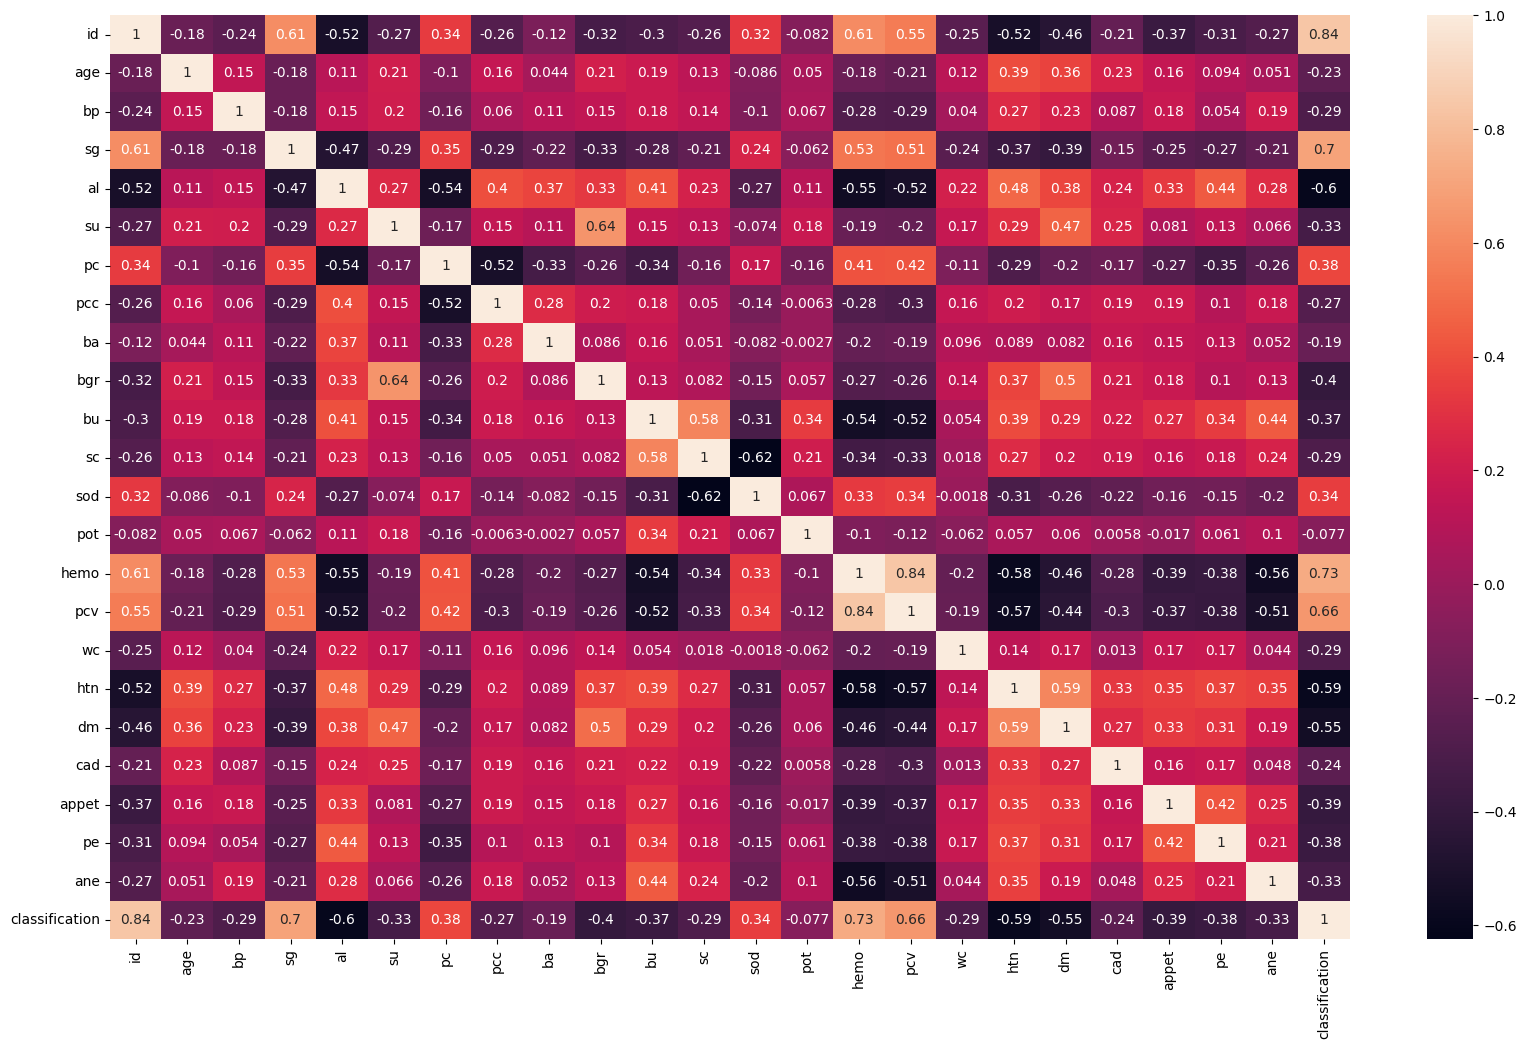

In [33]:
plt.figure(figsize=(20, 12))
crr = df.corr()
sns.heatmap(crr, annot=True)

In [57]:
li = list(crr['classification'][(crr['classification'] >= 0.5) | (crr['classification'] <= -0.5)].index)
li

['id', 'sg', 'al', 'hemo', 'pcv', 'htn', 'dm', 'classification']

In [54]:
X = df[li[:-1]]
Y = df[li[-1]]

In [56]:
X

,id,sg,al,hemo,pcv,htn,dm
0,0,1.020,1.0,15.4,44.0,1,2
1,1,1.020,4.0,11.3,38.0,0,1
2,2,1.010,2.0,9.6,31.0,0,2
3,3,1.005,4.0,11.2,32.0,1,1
4,4,1.010,2.0,11.6,35.0,0,1
...,...,...,...,...,...,...,...
395,395,1.020,0.0,15.7,47.0,0,1
396,396,1.025,0.0,16.5,54.0,0,1
397,397,1.020,0.0,15.8,49.0,0,1
398,398,1.025,0.0,14.2,51.0,0,1


## 5. 데이터 준비하기
- train, test데이터를 7:3의 비율로 나누어보시오

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

## 6. 최소 2개 이상의 모델링을 하여, 각 모델의 성능을 비교하시오.

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [60]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [61]:
y_predict = dt.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(Y_test, y_predict)
print(acc)

1.0


In [63]:
sv = svm.SVC(kernel='rbf')
sv.fit(X_train, Y_train)

SVC()

In [64]:
y_predict = sv.predict(X_test)

In [65]:
acc= accuracy_score(Y_test, y_predict)
print(acc)

1.0
